In [1]:
import networkx as nx
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt

# Degree Assortativity

In [2]:
air_graph = nx.read_gml("2016_aggregated_air_network.gml")
print(type(air_graph).__name__)

air_net = air_graph.to_undirected()
print(type(air_net).__name__)

DiGraph
Graph


In [3]:
#real_assortativity = nx.degree_assortativity_coefficient(air_net, x='out', y='in')
real_assortativity = nx.degree_assortativity_coefficient(air_net)
print("The network assortativity is :", real_assortativity)

The network assortativity is : 0.0323520951847


In [4]:
air_net_degree_sequence = list(dict(nx.degree(air_net)).values())

# We need to generate enough null graphs to make a reasonable assessment of the null distribution
model_assortativity = []
for i in range(1000):
    # Use the configuration model to create a null graph
    null_graph = nx.configuration_model(air_net_degree_sequence)
    
    # We need to remove self-loops and parallel edges because they don't make
    # sense in this network
    null_graph = nx.Graph(null_graph) # removes parallel edges
    null_graph.remove_edges_from(null_graph.selfloop_edges()) # removes self-loops
    
    # Calculate the model's assortativity and add it to the list
    model_assortativity.append(nx.degree_assortativity_coefficient(null_graph))

In [5]:
# Prepend the real assortativity to the model list and have scipy calculate the zscores
zscores = stats.zscore([real_assortativity] + model_assortativity)

# Just print out the first score which corresponds to the real network
print("The zscore of real network is:",zscores[0])

The zscore of real network is: 12.8723858533


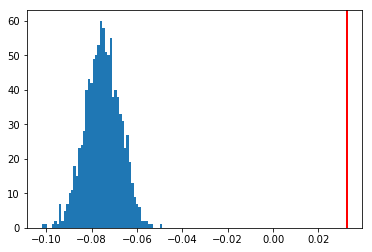

In [6]:
# Use the histogram function to plot the distribution of assortativity coefficients
plt.hist(model_assortativity, bins=50)

# axvline produces a vertical line at the designated x position on the graph
plt.axvline(real_assortativity, lw=2, color="red") #lw = 2 makes the line thicker
plt.show()

# Transitivity

In [7]:
real_transitivity = nx.transitivity(air_net)
print("The network Transitivity is:",real_transitivity)

The network Transitivity is: 0.4271897209493015


In [8]:
# We need to generate enough null graphs to make a reasonable assessment of the null distribution
model_transitivity = []
for i in range(1000):
    # Use the configuration model to create a null graph
    null_graph = nx.configuration_model(air_net_degree_sequence)
    
    # We need to remove self-loops and parallel edges because they don't make
    # sense in this network
    null_graph = nx.Graph(null_graph) # removes parallel edges
    null_graph.remove_edges_from(null_graph.selfloop_edges()) # removes self-loops
    
    # Calculate the model's assortativity and add it to the list
    model_transitivity.append(nx.transitivity(null_graph))

In [9]:
# Prepend the real assortativity to the model list and have scipy calculate the zscores
zscores_transitivity = stats.zscore([real_transitivity] + model_transitivity)

# Just print out the first score which corresponds to the real network
print("The zscore of real network is:",zscores_transitivity[0])

The zscore of real network is: 30.5476073446


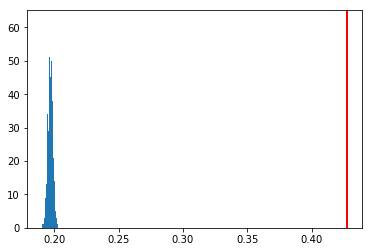

In [10]:
# Use the histogram function to plot the distribution of transitivity coefficients
plt.hist(model_transitivity, bins=50)

# axvline produces a vertical line at the designated x position on the graph
plt.axvline(real_transitivity, lw=2, color="red") #lw = 2 makes the line thicker
plt.show()